# ERC-4626: all vaults on Arbitrum

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 25,161 vaults in the database and 6,996,986 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 150,550 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-04-24 00:30:42  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-05-08 12:27:18  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-05-22 22:58:34  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   
2024-04-24 00:30:42  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     204166721   
2024-05-08 12:27:18  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     209120321   
2024-05-22 22:58:34  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     214016321   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   
2024-04-24 00:30:42         1.01      6,802.02      6,764.67              NaN   
2024-05-08 12:27:18         1.01     70,892.40     69,926.90              NaN   
2024-05-22 22:58:34         1.02     11,944.42     11,706.90              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6429   
2024-04-24 00:30:42             NaN         Staked USDA (Arbitrum) #6429   
2024-05-08 12:27:18             NaN         Staked USDA (Arbitrum) #6429   
2024-05-22 22:58:34             NaN         Staked USDA (Arbitrum) #6429   

                     event_count                       protocol  \
timestamp                                                         
2024-01-11 09:13:06       255238  <protocol not yet identified>   
2024-04-24 00:30:42       255238  <protocol not yet identified>   
2024-05-08 12:27:18       255238  <protocol not yet identified>   
2024-05-22 22:58:34       255238  <protocol not yet identified>   

                     raw_share_price  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2024-01-11 09:13:06             1.00        0.00           879,674.42   
2024-04-24 00:30:42             1.01        0.00           879,674.42   
2024-05-08 12:27:18             1.01        0.00           879,674.42   
2024-05-22 22:58:34             1.02        0.00           879,674.42   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2024-01-11 09:13:06              17,593.49                True  
2024-04-24 00:30:42              17,593.49                True  
2024-05-08 12:27:18              17,593.49                True  
2024-05-22 22:58:34              17,593.49                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 290 vaults out of total of 5,754 vaults on chain Arbitrum, having 92,161 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4           Share token                                             plvGLP
5                   NAV                          218852.566660400704649665
6              Protocol                      <protocol not yet identified>
7              Mgmt fee                                               None
8              Perf fee                                               None
9           Deposit fee                                               None
10         Withdraw fee                                               None
11               Shares                          157940.074220509572793378
12           First seen                                2022-08-26 11:27:33
13             Features                                                   
14              Lock up                                               None
15      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
16  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
17         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...
18                _fees  FeeData(fee_mode=None, management=None, perfor...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/119 [00:00<?, ?it/s]

Cleaning metrics for 119 vaults
Vault entries with too high NAV values filtered out: 1
Vault entries with too small ATH NAV values filtered out: 2
Vaults abnormally high returns: 5
Vault entries with too few deposit and redeem events (min 25) filtered out: 5
Calculated lifetime metrics for 103 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  \
82   Borrowable USDC Deposit, SiloId: 146             0.11   
103            Curve LLAMMA IBTC / crvUSD             0.11   

     lifetime_return_net  cagr  cagr_net  three_months_returns  \
82                  0.11  0.64      0.64                  0.11   
103                 0.11  0.08      0.08                  0.04   

     three_months_returns_net  three_months_cagr  three_months_cagr_net  \
82                       0.11               0.64                   0.64   
103                      0.04               0.75                   0.75   

     three_months_sharpe  three_months_sharpe_net  three_months_volatility  \
82                  3.16                     3.16                     0.25   
103                 9.40                     9.40                     0.23   

     one_month_returns  one_month_returns_net  one_month_cagr  \
82                0.09                   0.09            3.02   
103               0.04                   0.04            0.75   

     one_month_cagr_net denomination share_token     chain      peak_nav  \
82                 3.02         USDC   bUSDC-146  Arbitrum 16,607,410.90   
103                0.75       crvUSD    cvcrvUSD  Arbitrum    407,182.92   

      current_nav  years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
82  15,043,045.32   0.21      0.00      0.00         0.00          0.00   
103     65,368.63   1.26      0.00      0.00         0.00          0.00   

                               fee_mode fee_internalised  \
82    VaultFeeMode.internalised_minting             True   
103  VaultFeeMode.internalised_skimming             True   

                                            gross_fees  \
82   FeeData(fee_mode=<VaultFeeMode.internalised_mi...   
103  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   

                                              net_fees fee_label lockup  \
82   FeeData(fee_mode=<VaultFeeMode.internalised_mi...   0% / 0% 0 days   
103  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   0% / 0% 0 days   

     event_count      protocol                    risk  risk_numeric  \
82         30944  Silo Finance  VaultTechnicalRisk.low         20.00   
103          588        LLAMMA  VaultTechnicalRisk.low         20.00   

                                                   id          start_date  \
82   42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9 2025-09-04 18:15:00   
103  42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d 2024-08-19 17:01:50   

               end_date                                     address  chain_id  \
82  2025-11-20 11:21:14  0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9     42161   
103 2025-11-23 17:23:07  0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d     42161   

     stablecoinish     last_updated_at  last_updated_block       features  
82            True 2025-11-20 11:21:14           402224321    [silo_like]  
103           True 2025-11-23 17:23:07           403347521  [llamma_like]

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 100 vaults.
Last update 2025-11-26 11:23:46
Formatted data for 99 vaults.
Top 99 vaults by 1 month annualised return are: Borrowable USDC Deposit, SiloId: 146, Curve LLAMMA IBTC / crvUSD, Borrowable USDC Deposit, SiloId: 127, Angmar Capital, Plutus Hedge Token, Silo Finance Borrowable USDC Deposit in ARB Silo, USDC-2 yVault, gTrade (Gains Network USDC), MEV Capital USDC, Curve LLAMMA asdCRV / crvUSD, Borrowable USDC Deposit, SiloId: 145, Clearstar High Yield USDC, Hyperithm USDC, Yield Chasing Silo USDC, Clearstar USDC Reactor, Staked USDai, Euler Arbitrum sUSDC, K3 Capital USDai USDC, Yearn Degen USDC, Yield Chasing crvUSD, Euler Arbitrum USDC, Tokemak arbUSD, DAMM Stablecoin Fund, gmUSDC, Euler Earn USDC, Frontier Theo USDC, Gauntlet USDC Core, Saving USX, Euler Arbitrum Yield USDC, Dolomite: USDC, Steakhouse High Yield USDC, Staked USDA, Dolomite: USDT, Revert Lend Arbitrum USDC,, Euler Arbitrum USDT0, Yield Chasing USDC, Spark USDC V

Name  \
#                                                      
1               Borrowable USDC Deposit, SiloId: 146   
2                         Curve LLAMMA IBTC / crvUSD   
3               Borrowable USDC Deposit, SiloId: 127   
4                                     Angmar Capital   
5                                 Plutus Hedge Token   
6   Silo Finance Borrowable USDC Deposit in ARB Silo   
7                                      USDC-2 yVault   
8                        gTrade (Gains Network USDC)   
9                                   MEV Capital USDC   
10                      Curve LLAMMA asdCRV / crvUSD   
11              Borrowable USDC Deposit, SiloId: 145   
12                         Clearstar High Yield USDC   
13                                    Hyperithm USDC   
14                           Yield Chasing Silo USDC   
15                            Clearstar USDC Reactor   
16                                      Staked USDai   
17                              Euler Arbitrum sUSDC   
18                             K3 Capital USDai USDC   
19                                  Yearn Degen USDC   
20                              Yield Chasing crvUSD   
21                               Euler Arbitrum USDC   
22                                    Tokemak arbUSD   
23                              DAMM Stablecoin Fund   
24                                            gmUSDC   
25                                   Euler Earn USDC   
26                                Frontier Theo USDC   
27                                Gauntlet USDC Core   
28                                        Saving USX   
29                         Euler Arbitrum Yield USDC   
30                                    Dolomite: USDC   
31                        Steakhouse High Yield USDC   
32                                       Staked USDA   
33                                    Dolomite: USDT   
34                        Revert Lend Arbitrum USDC,   
35                              Euler Arbitrum USDT0   
36                                Yield Chasing USDC   
37                                  Spark USDC Vault   
38                   Concrete USDC MultiSig Strategy   
39                        Curve LLAMMA WBTC / crvUSD   
40                              Edge UltraYield USDC   
41                            Llamarisk crvUSD Vault   
42                         Wrapped Aave Arbitrum GHO   
43                                        autoSUSDai   
44                                    Fluid USD Coin   
45                                   Fluid Gho Token   
46                       Wrapped Aave Arbitrum USDCn   
47                        Static Aave Arbitrum USDCn   
48                         Trust Wallet AAVE v3 USDC   
49              Crypto.com Defi Wallet Compound USDC   
50                        Wrapped Aave Arbitrum USDT   
51                         Static Aave Arbitrum USDT   
52                  Crypto.com Defi Wallet AAVE USDC   
53                               Gauntlet USDC Prime   
54                      IPOR USDC Arbitrum Optimizer   
55                                   Summer.fi USD₮0   
56                         Trust Wallet AAVE v3 USDT   
57                        gTrade (Gains Network DAI)   
58                                  Fluid Tether USD   
59                        Curve LLAMMA WETH / crvUSD   
60                         Curve LLAMMA ARB / crvUSD   
61                        fija Strategy USDC AaveOpt   
62                                       Staked EURA   
63                        Curve LLAMMA EYWA / crvUSD   
64                                       Staked USDX   
65                                           dgnHYPE   
66                                   USDC-APE shares   
67                          Trust Wallet AAVE v3 DAI   
68                                Fractality LR USDT   
69                           K3 Capital USDai sUSDai   
70                        Curve LLAMMA WETH / crvUSD   
71              

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

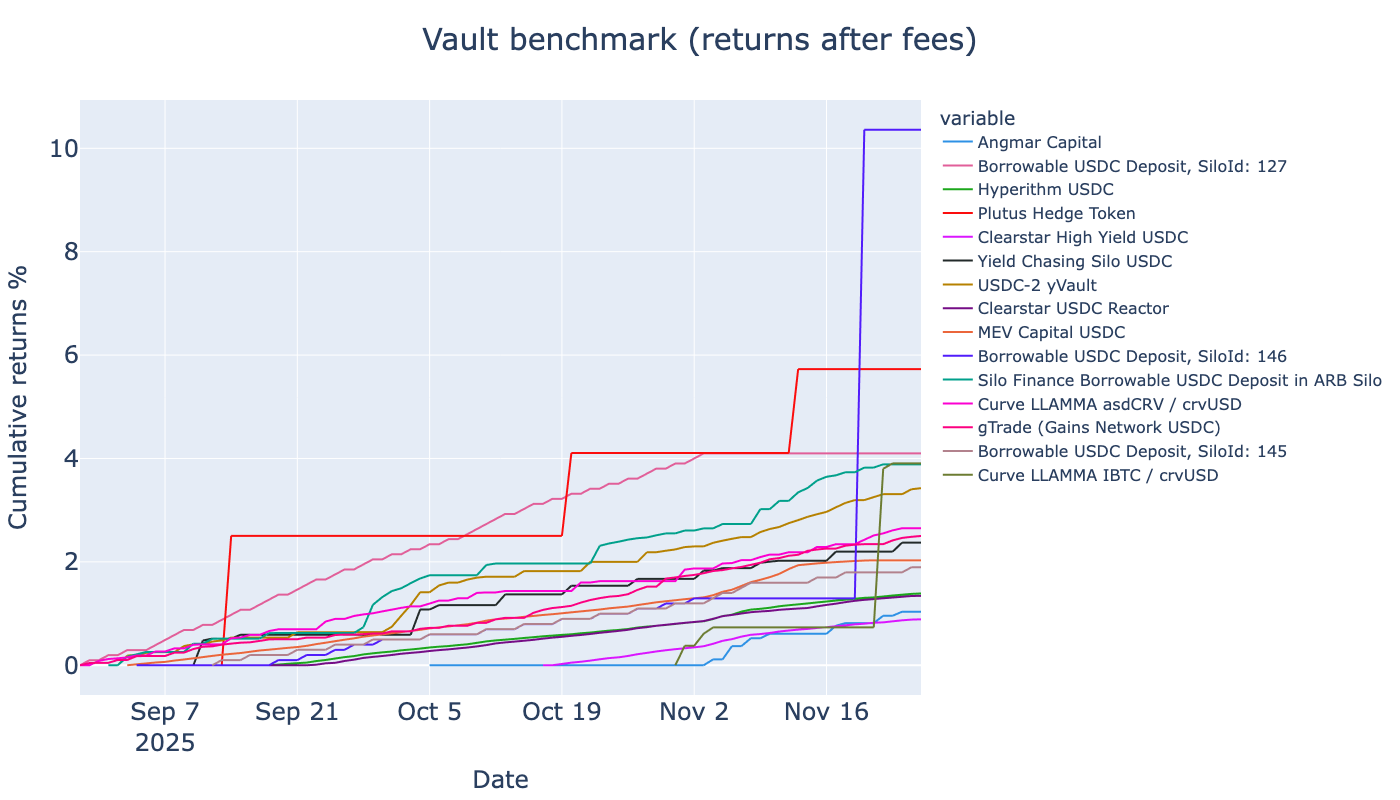

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

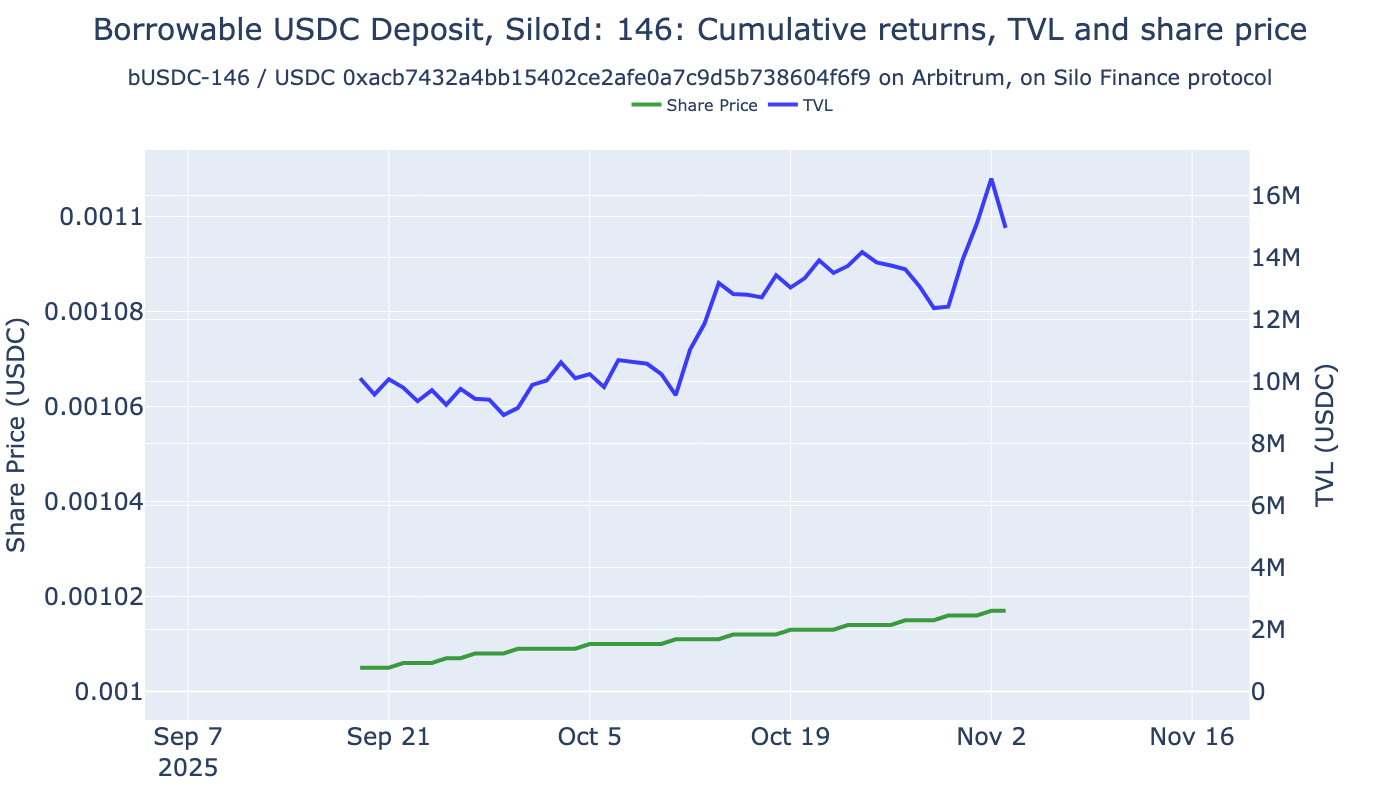

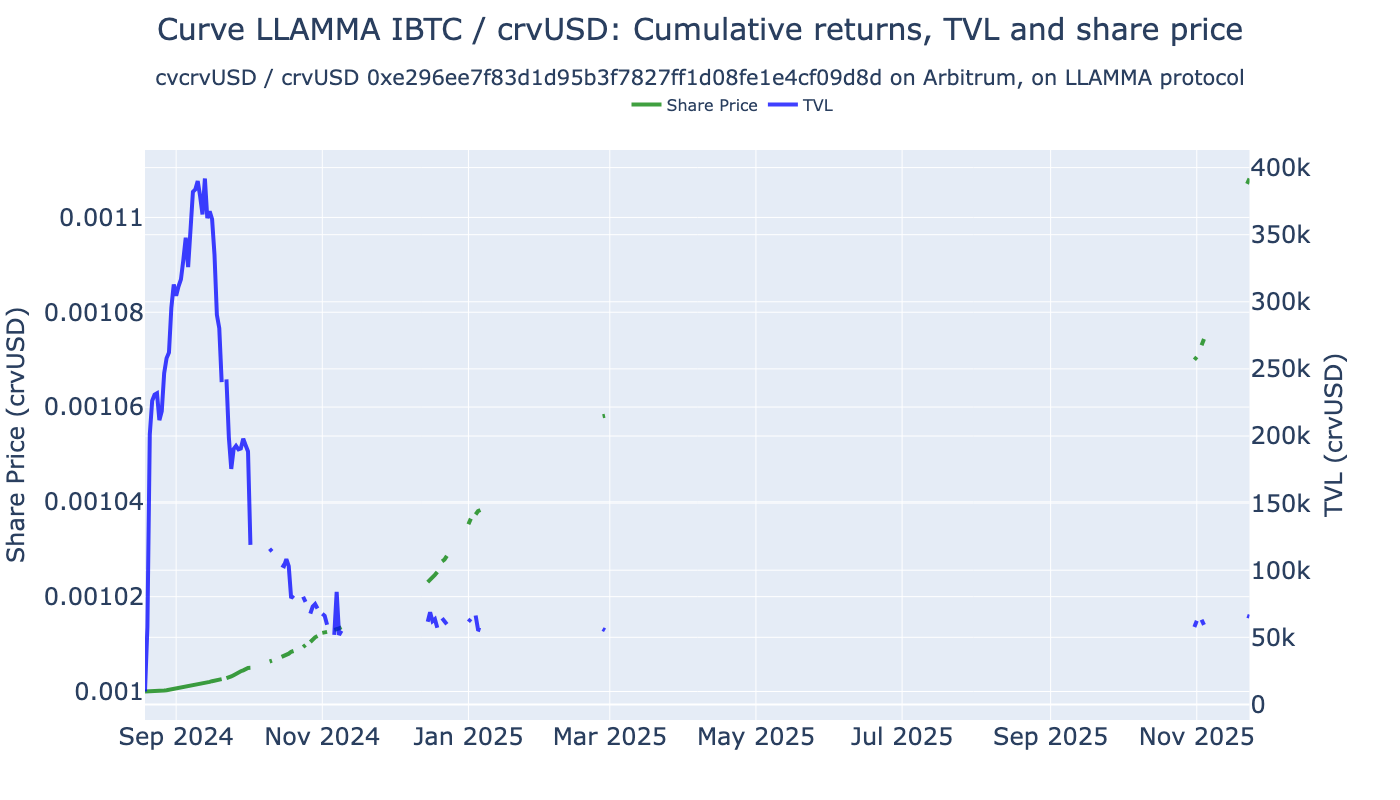

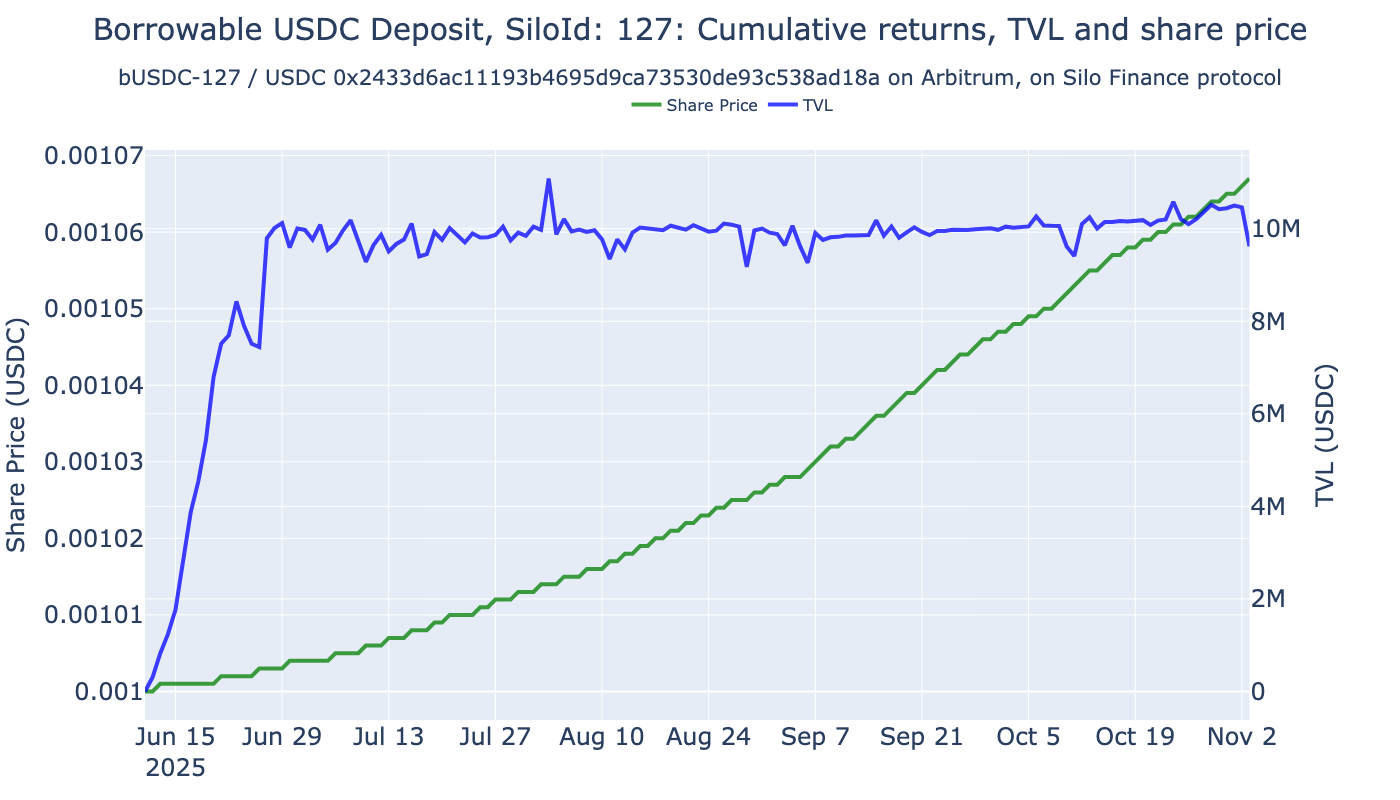

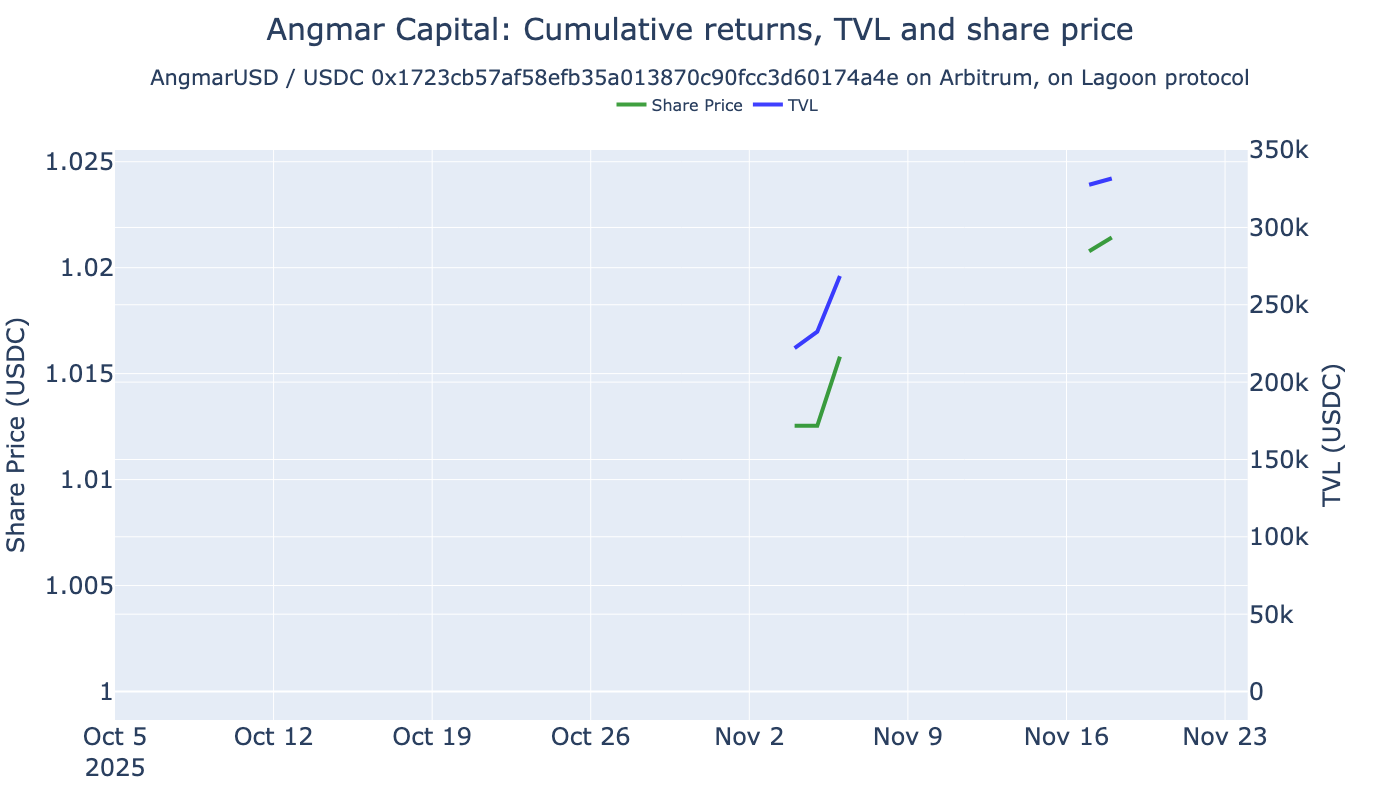

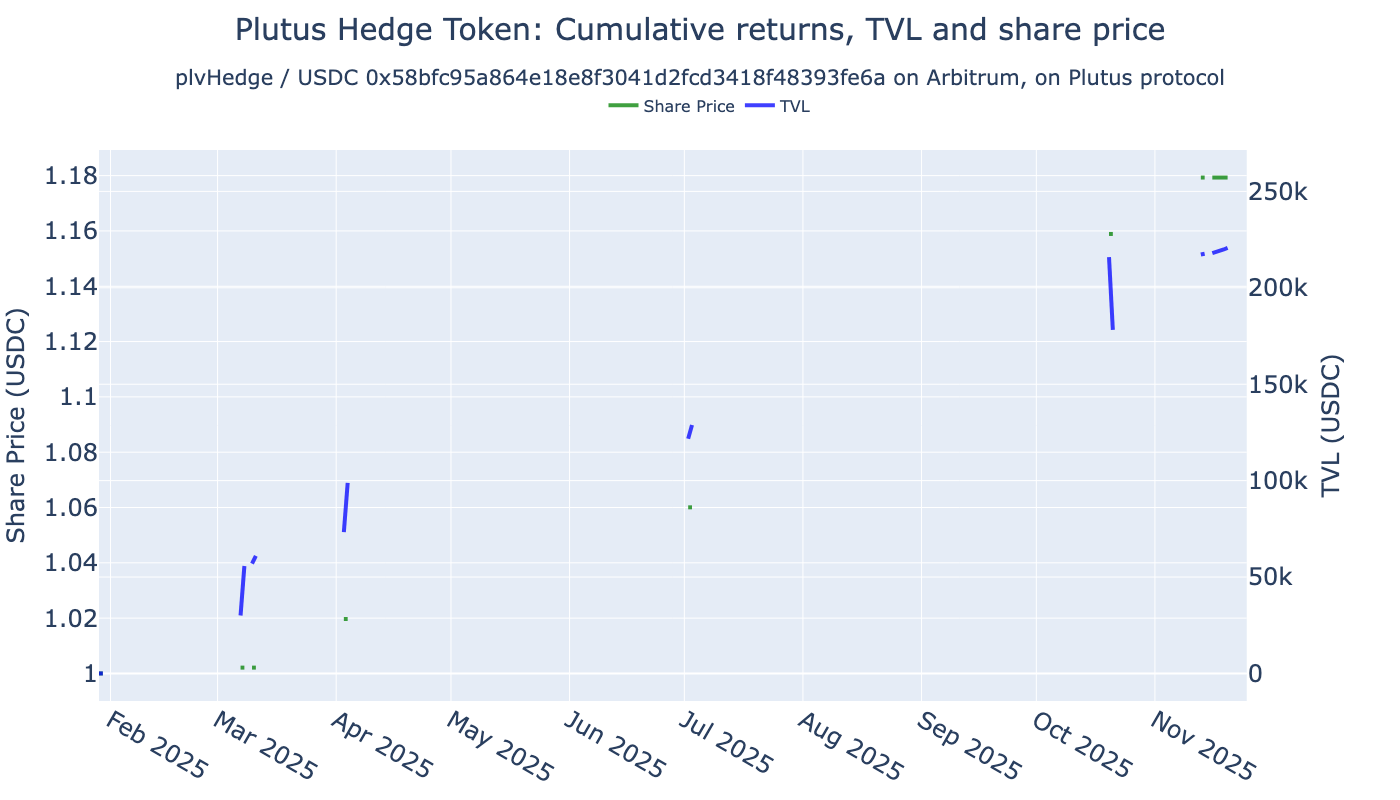

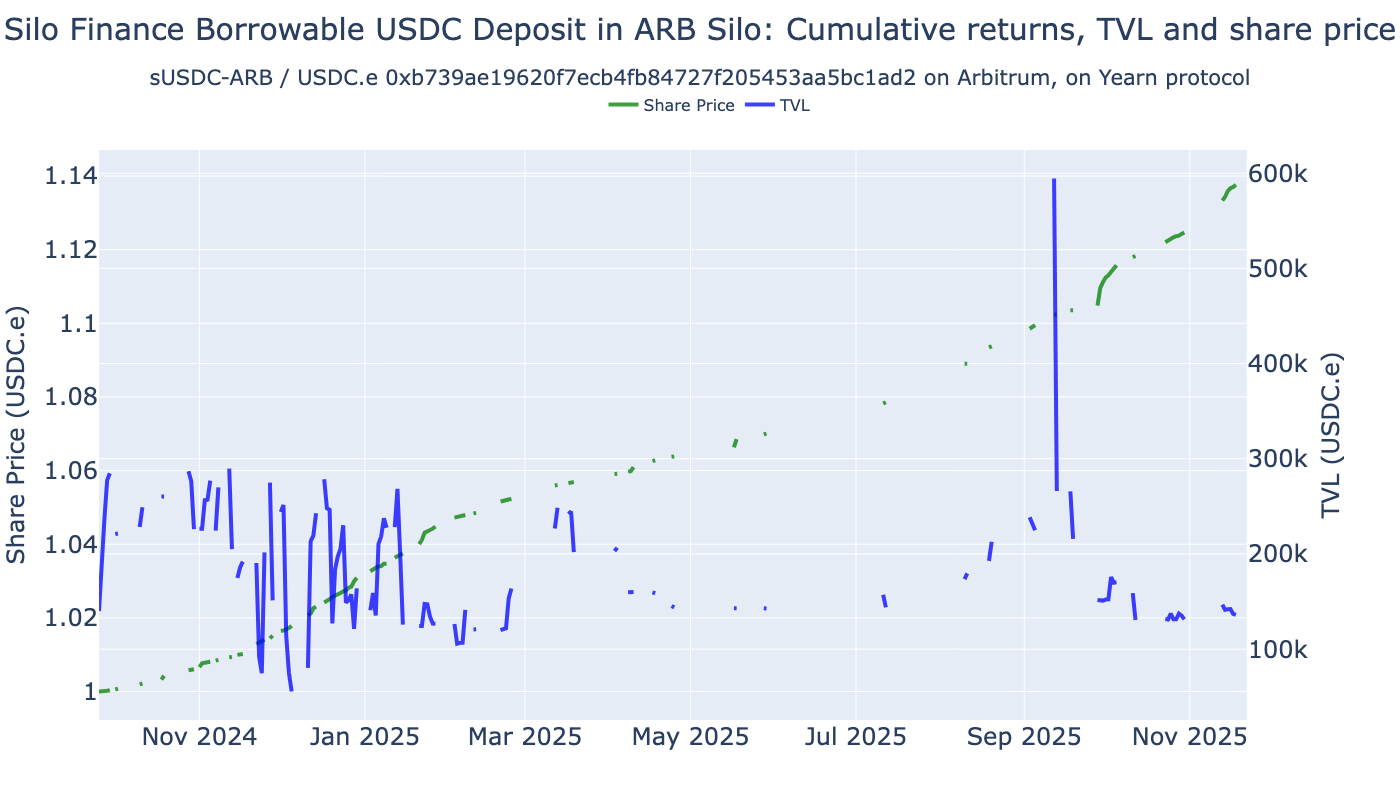

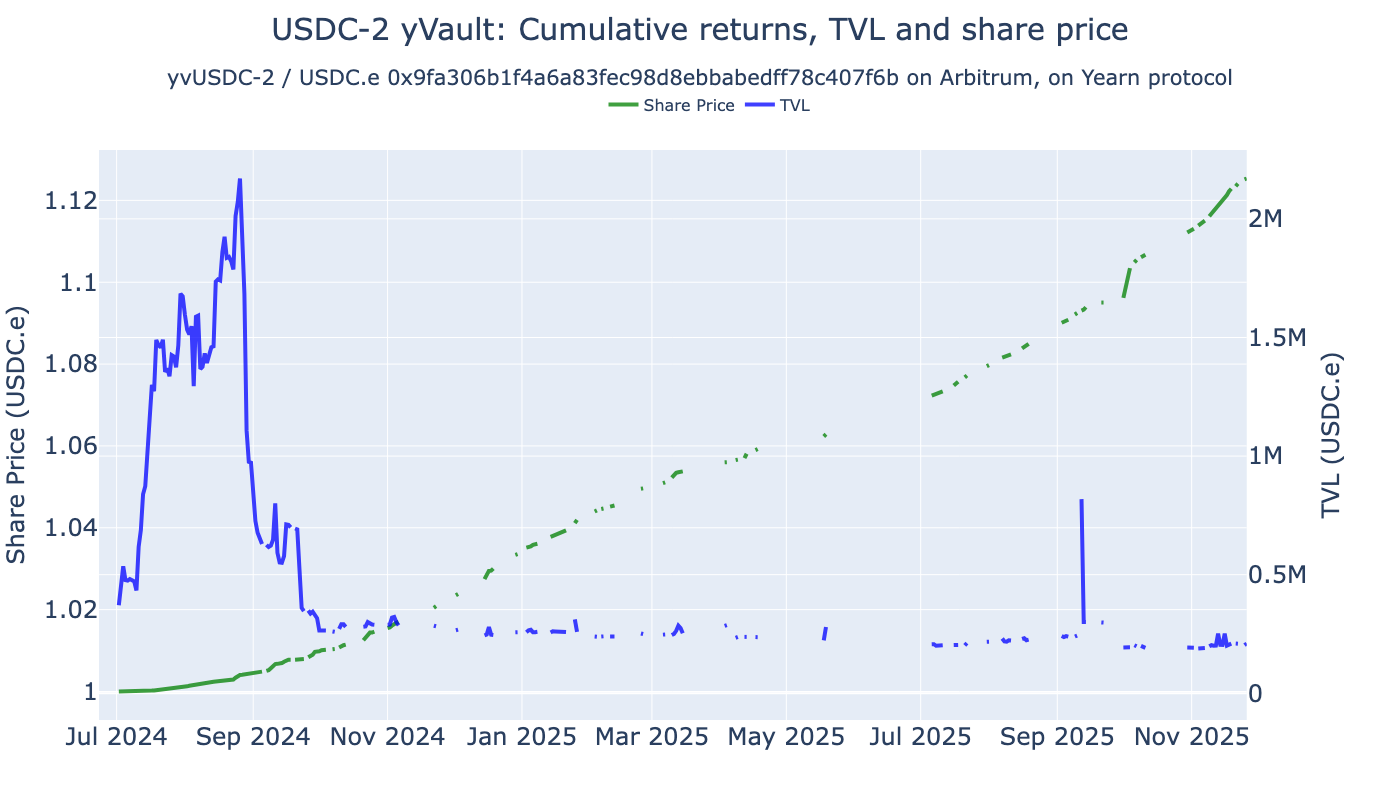

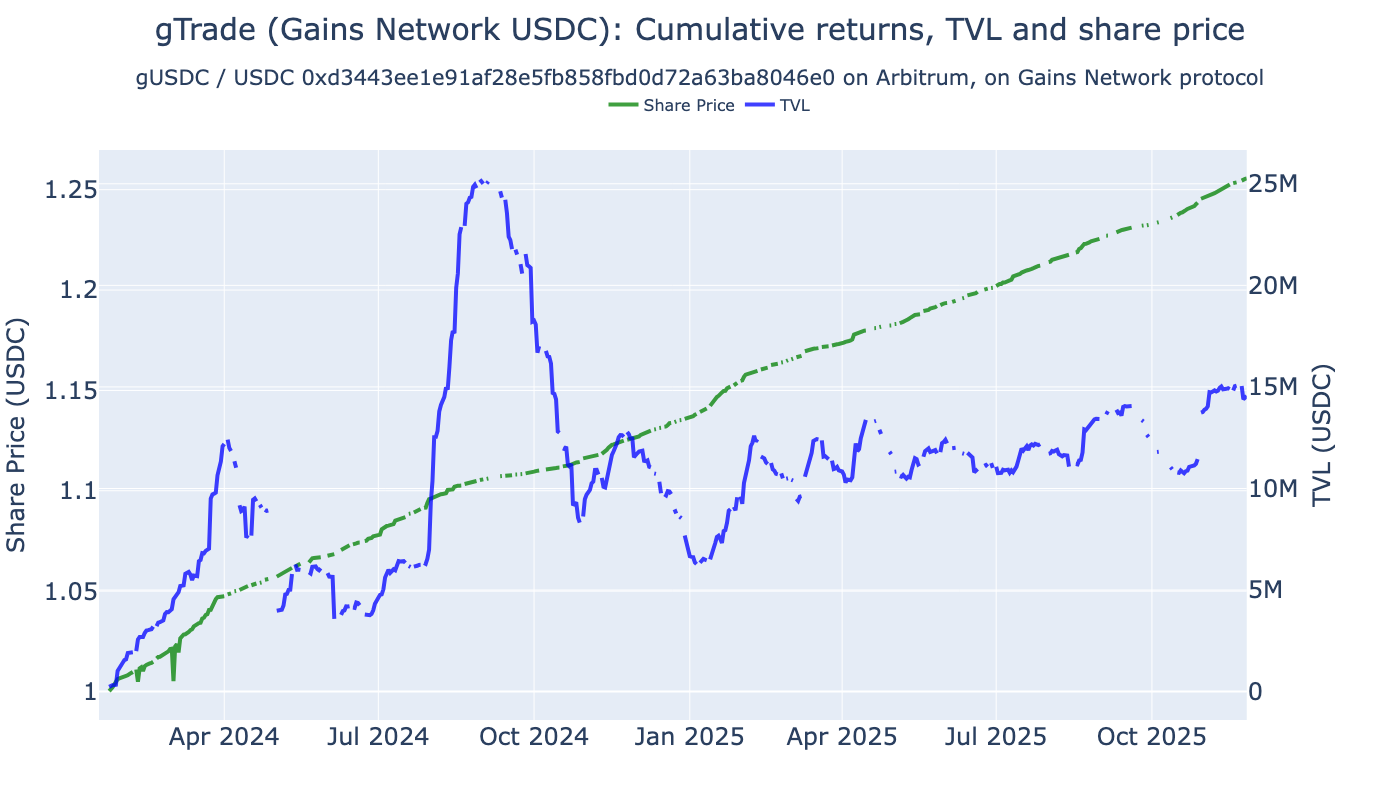

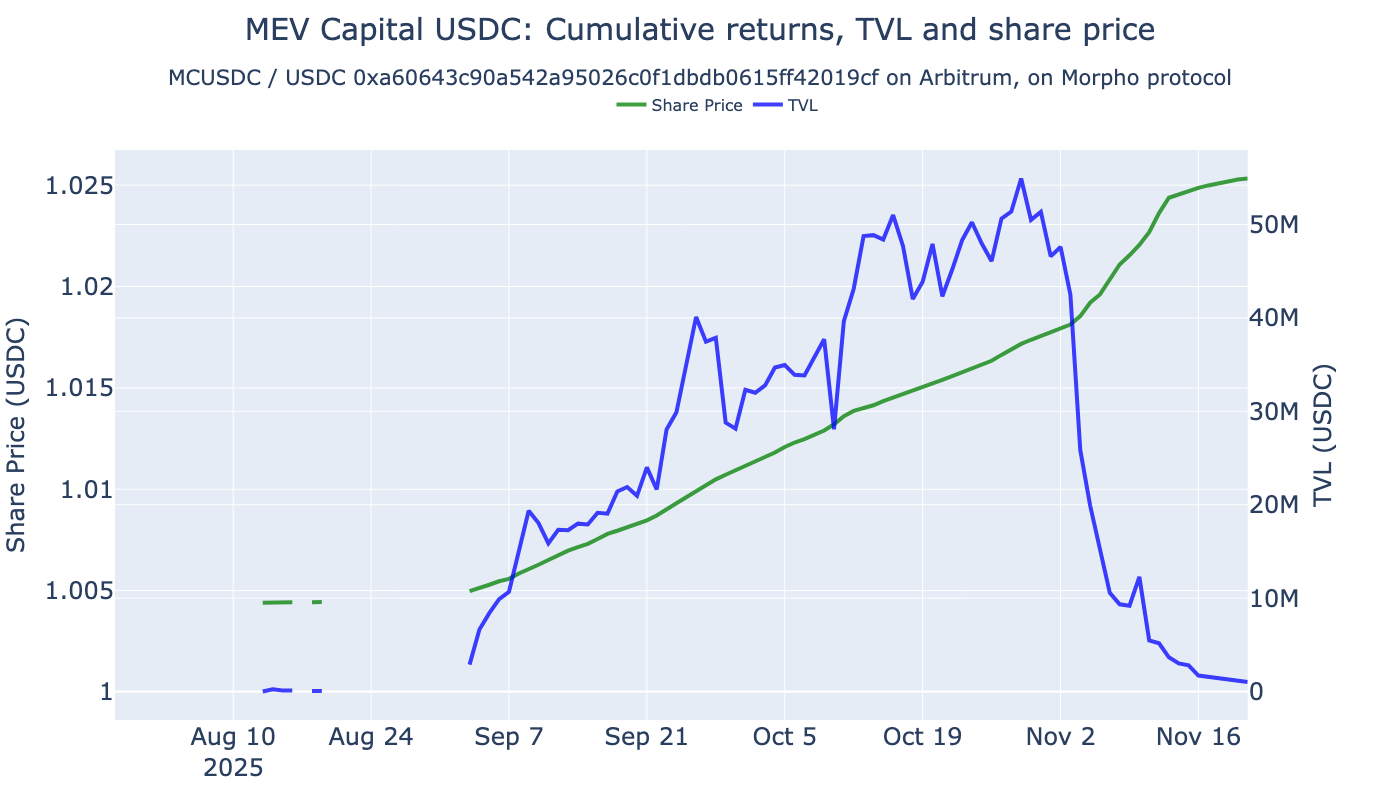

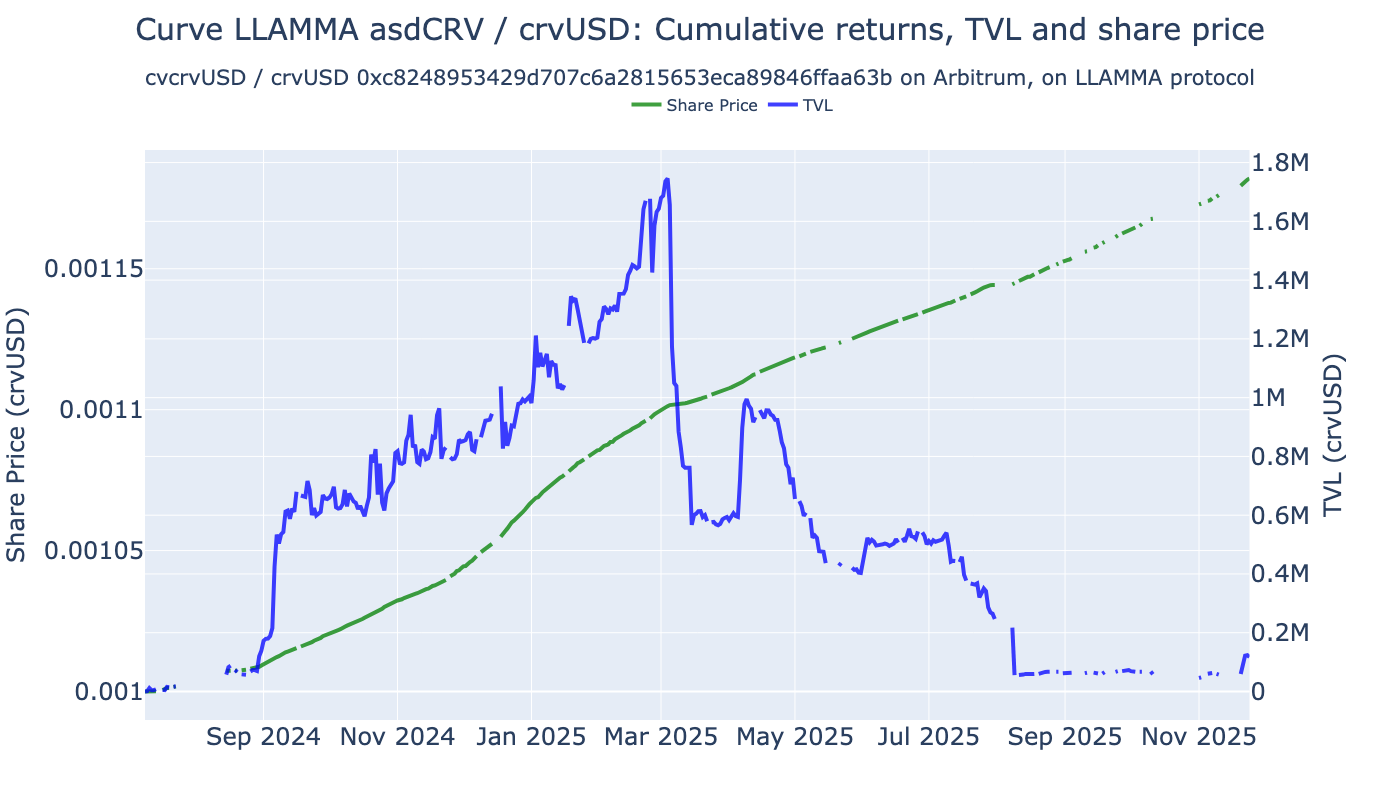

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

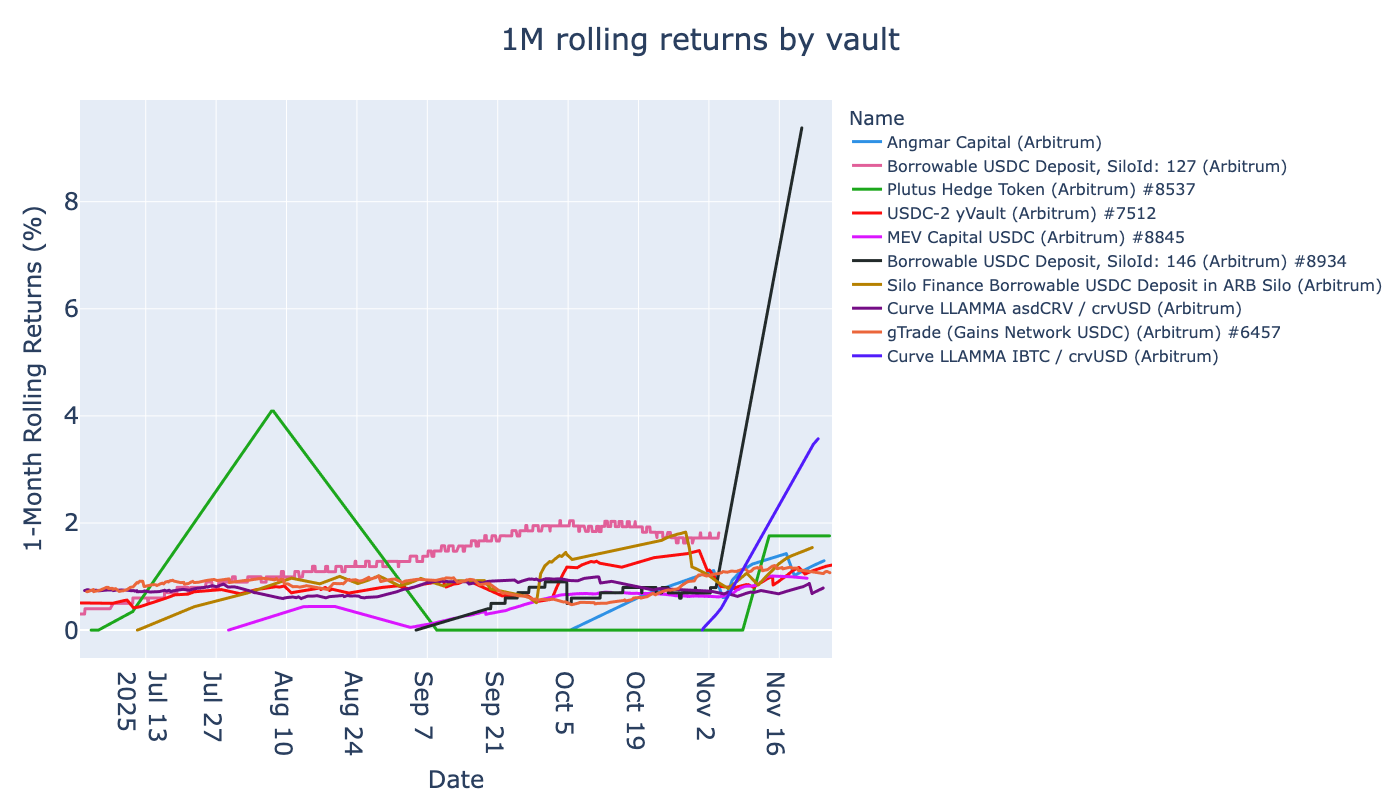

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name  \
#                                                      
1               Borrowable USDC Deposit, SiloId: 146   
2                         Curve LLAMMA IBTC / crvUSD   
3               Borrowable USDC Deposit, SiloId: 127   
4                                     Angmar Capital   
5                                 Plutus Hedge Token   
6   Silo Finance Borrowable USDC Deposit in ARB Silo   
7                                      USDC-2 yVault   
8                        gTrade (Gains Network USDC)   
9                                   MEV Capital USDC   
10                      Curve LLAMMA asdCRV / crvUSD   
11              Borrowable USDC Deposit, SiloId: 145   
12                         Clearstar High Yield USDC   
13                                    Hyperithm USDC   
14                           Yield Chasing Silo USDC   
15                            Clearstar USDC Reactor   
16                                      Staked USDai   
17                              Euler Arbitrum sUSDC   
18                             K3 Capital USDai USDC   
19                                  Yearn Degen USDC   
20                              Yield Chasing crvUSD   
21                               Euler Arbitrum USDC   
22                                    Tokemak arbUSD   
23                              DAMM Stablecoin Fund   
24                                            gmUSDC   
25                                   Euler Earn USDC   
26                                Frontier Theo USDC   
27                                Gauntlet USDC Core   
28                                        Saving USX   
29                         Euler Arbitrum Yield USDC   
30                                    Dolomite: USDC   
31                        Steakhouse High Yield USDC   
32                                       Staked USDA   
33                                    Dolomite: USDT   
34                        Revert Lend Arbitrum USDC,   
35                              Euler Arbitrum USDT0   
36                                Yield Chasing USDC   
37                                  Spark USDC Vault   
38                   Concrete USDC MultiSig Strategy   
39                        Curve LLAMMA WBTC / crvUSD   
40                              Edge UltraYield USDC   
41                            Llamarisk crvUSD Vault   
42                         Wrapped Aave Arbitrum GHO   
43                                        autoSUSDai   
44                                    Fluid USD Coin   
45                                   Fluid Gho Token   
46                       Wrapped Aave Arbitrum USDCn   
47                        Static Aave Arbitrum USDCn   
48                         Trust Wallet AAVE v3 USDC   
49              Crypto.com Defi Wallet Compound USDC   
50                        Wrapped Aave Arbitrum USDT   
51                         Static Aave Arbitrum USDT   
52                  Crypto.com Defi Wallet AAVE USDC   
53                               Gauntlet USDC Prime   
54                      IPOR USDC Arbitrum Optimizer   
55                                   Summer.fi USD₮0   
56                         Trust Wallet AAVE v3 USDT   
57                        gTrade (Gains Network DAI)   
58                                  Fluid Tether USD   
59                        Curve LLAMMA WETH / crvUSD   
60                         Curve LLAMMA ARB / crvUSD   
61                        fija Strategy USDC AaveOpt   
62                                       Staked EURA   
63                        Curve LLAMMA EYWA / crvUSD   
64                                       Staked USDX   
65                                           dgnHYPE   
66                                   USDC-APE shares   
67                                            HYPE++   
68                              AI Dollar Alpha USDC   
69                                        Sake-WATER   
70                             Varlamore USDC Growth   
71              